# California Housing dataset analysis with scikit-learn

In this notebook we will work through an extended example of exploratory data analysis and supervised machine learning using the California Housing Price Dataset. This dataset consists of data about housing characteristics and prices in many districts of the state of California. The **task** this dataset asks us to solve is estimating the median house value in a district from a set of independent housing characteristics.

## Part 1: Exploratory analysis

In this first section we will analyze our dataset and build a simple linear regression pipeline.\
This is an pivotal task in Data Science to produce replicable results on different scales and analysisi.

### Step 1: Data Modeling

The first thing we want to do is get our dataset loaded and start to get a feel for it. 

In [3]:
# Initial imports -- these are fairly standard.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

# Import the function that will download the dataset.
from sklearn.datasets import fetch_california_housing

# Load the sklearn version of the California Housing dataset.
ds = fetch_california_housing()

### Step 1.1: Poking Around

Now we spend some time looking at the elements of the `ds` we just loaded (it's a python `dict`).\
We explore the description of the dataset to understand what the features are and what the targets variable is. 

Then, we are going to construct a Pandas `DataFrame` that has more interesting properties for data storing and handling.

In [4]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

These keys help me understand the calls that I can use to explore the dataset.

In [5]:
ds['data'].shape

(20640, 8)

We have 20640 observations for 8 features in our dataset.
Here we print our features.
#### Features:

In [6]:
ds['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Below there is a description for each of the features, obtained with *DESCR*.\
Now, let us understand which are the target variables:

In [7]:
print(ds['target_names'])
ds['target']

['MedHouseVal']


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

We want to predict the variable 'MedHouseVal'.
Let us explore more in detail the definition of the exlpanatory variables and target variable:

In [8]:
print(ds.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

#### Target variable:
Here it is clearly explained what 'MedHouseVal' represents:\
"The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000)."

### Step 1.2: Creating a Pandas DataFrame

OK, now we can create the `DataFrame` to hold our independent variables and a `Series` to hold the target values.\
> Some relevant documentation: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [10]:
# Here we create a Pandas DataFrame for our dataset and a Pandas Series
# for the targets.

# Here we separate the indepent variables from the target
explanatory_v = ds.data
target_v = ds.target

# Building the DataFrame
df = pd.DataFrame(data=explanatory_v, columns=ds.feature_names)

# Building the Series
targets = pd.Series(target_v)

Column names to the features have been assiged via the `feature_names` key applied to `ds`.\
The `Series` object does not accept the specification of columns names (given that it only accepts one column).

### Step 1.3: Examining the Data

Here we study the *decriptive statistics* of the data to observe if some particular behaviour is present, together with the scaling of the features.
(this can be done easily with the `describe()`method on the DataFrame)

In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


What we can observe from this summary is that variables have much different scales, for example the mean of **Population** is centered at 1425.48 whilst **MedInc** is at 3.87, or **HouseAge** at 28.64.\
Futhermore, we could observe the `max` statistics in the summary in order to have an idea of outliers that could disturb the analysis the data:\
The variable **AveRooms** has a mean equal to 5.43, but a max value of 141.9!\
Similarly, **AveBedrms** has mean equal to 1.09 and max value of 34.07.\
Of couse, also the standard deviation is expressed in a different scale, for example: 0.47 for **AveBedrms** vs 10.39 for **AveOccup**.

With data distributed as such, one could think about standardising the dataset.

---
### Step 2: Visualization

OK, now that we have a bit of a *feel* for our data, let's get a better idea about it through visualization.

### Step 2.1: Visualizing the Target
Now we can visualize our data, creating a plot to study the **distribution** of our target values.\
The best tool for that is a **histogram**.

> **Note**: In addition to *histograms*, we will try out the Seaborn function `distplot`.

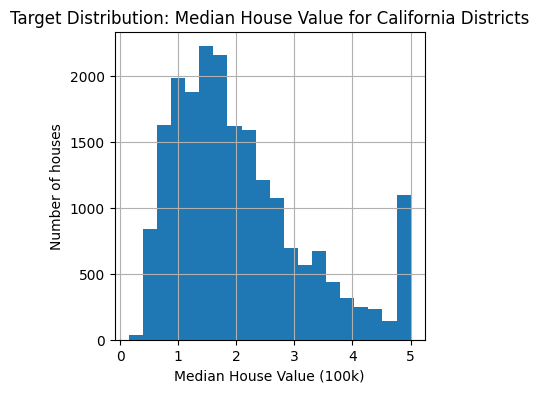

In [12]:
plt.figure(figsize=(4,4))
targets.hist(bins=20)
plt.title("Target Distribution: Median House Value for California Districts")
plt.ylabel("Number of houses")
plt.xlabel("Median House Value (100k)")
plt.show()

/var/folders/ln/8m1n1x0d0692gmx_80h6n4zw0000gn/T/ipykernel_2641/955631705.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(targets)


<Axes: ylabel='Density'>

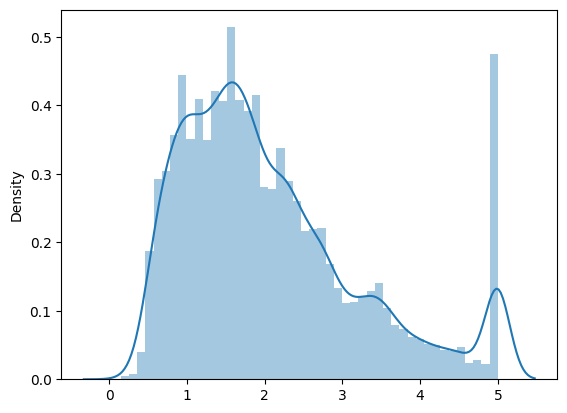

In [15]:
sns.distplot(targets)

Seaborn function allows to visualise the histogram with the density curve plotted together.\
Analysing the distribution and histogram of our target variable (*Number of houses that have a specific Median House Value*), we observe that is not distributed as a Normal Density Function; in particular, it is **right-skewed** as the most numerous values are between 100k and 200k MedHouseVal.\
We observe a sensibly more higher bin at 500k MedHouseVal, this is due to the fact that all of the houses whose value is priced above 500k are **capped** at 500k.\
Graphically, we see more than 1000 Houses in the last bin.\
We can observe this numerically:

In [16]:
cap = targets.sort_values(ascending=False).head(1000)*100000
print(cap)

10667    500001.0
16916    500001.0
16946    500001.0
8877     500001.0
8878     500001.0
           ...   
4237     498700.0
6915     498600.0
5753     498400.0
4114     497600.0
5889     497400.0
Length: 1000, dtype: float64


### Step 2.2: Subplots
Now we want to visualize the distributions of **all** of the independent features in the dataset. 

One important thing that will help us later:
+ We will encapsulate the plotting code in a **function** to be called later.

The function **plotting_subplots** is defined in order to be used further in the code, independetly on the dataframe assigned as argument of the function.

In [18]:
def plotting_subplots(my_dataframe):   # Note: just DataFrame and not Series

    # First I have to retrieve the number of columns in order to prepare the subplot structure
    # (this is done to more more generic as possible)
    num_cols = my_dataframe.shape[1]
    colonne = 4
    righe = int(np.ceil(num_cols / colonne))

    # Plotting
    fig, axes = plt.subplots(nrows=righe, ncols=colonne,figsize=(20,15))
    axes=axes.flatten()
    for i,col in enumerate(df.columns):
        df[col].hist(ax=axes[i],bins=30)
        axes[i].set_title(df.columns[i])

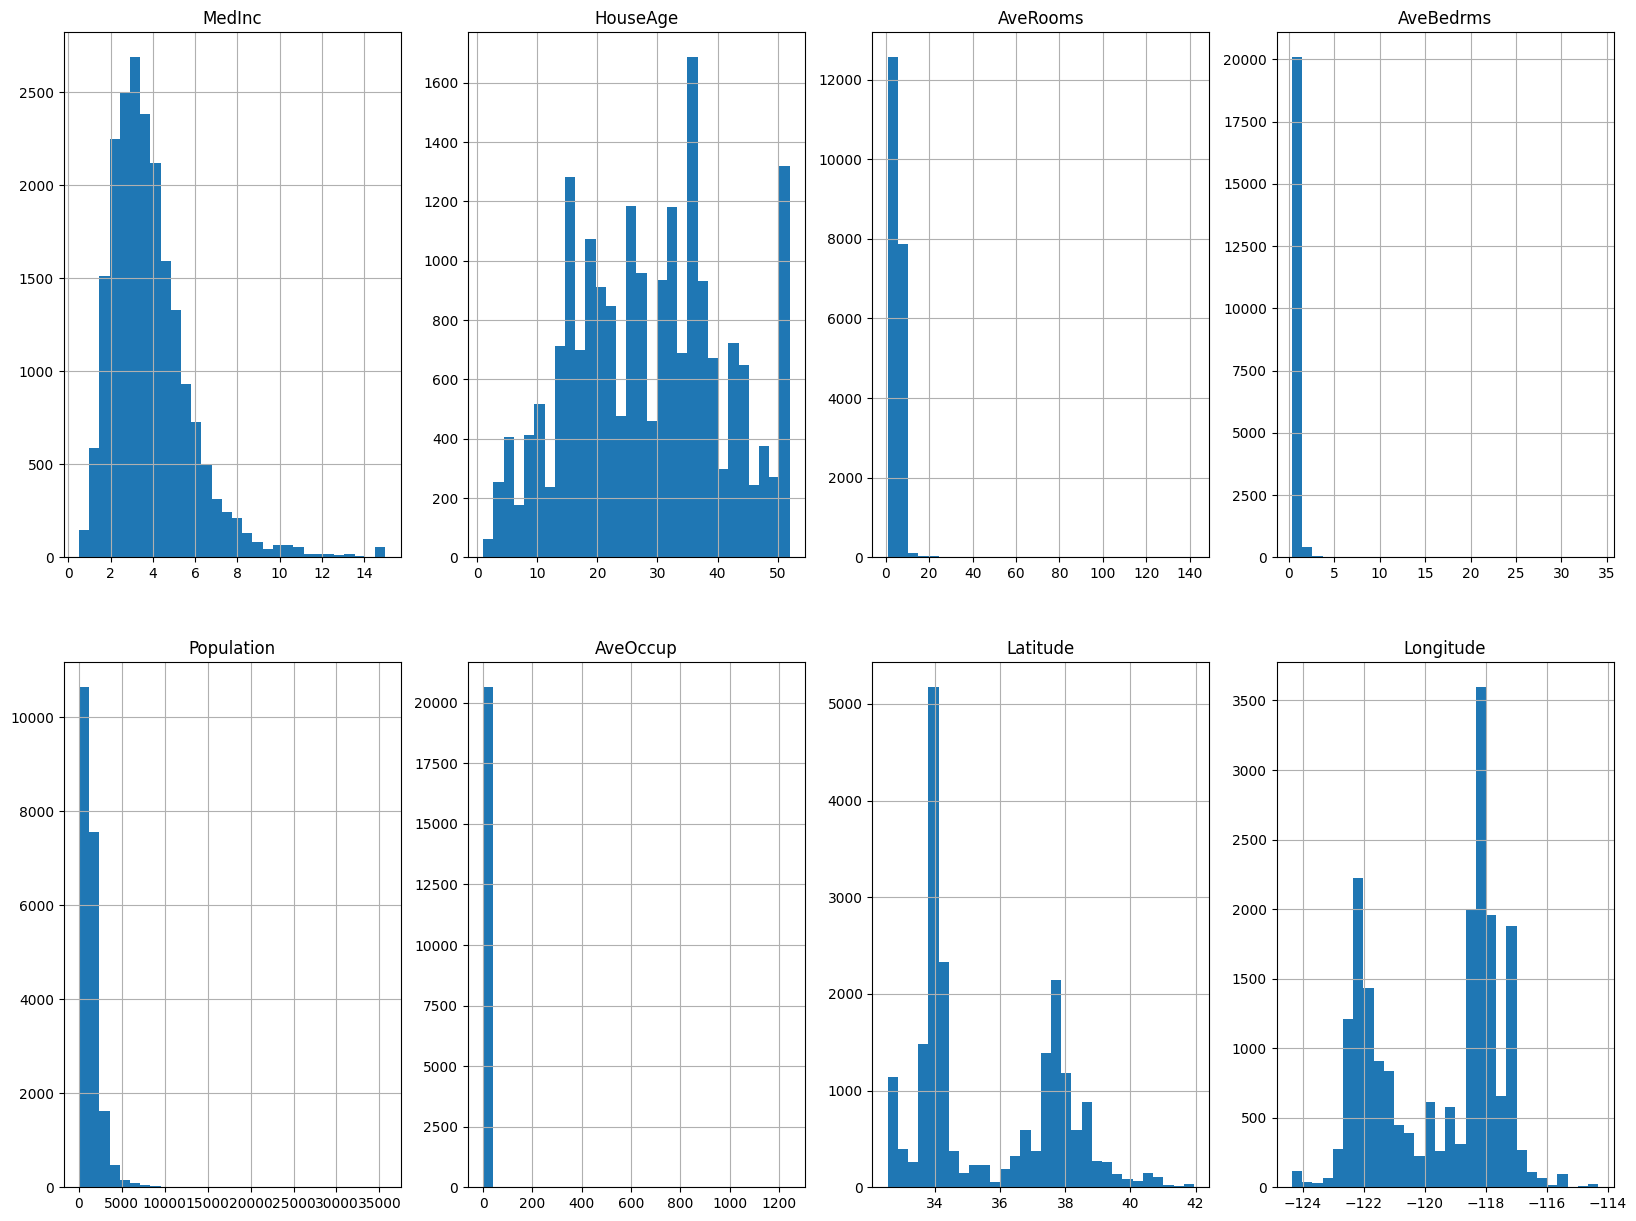

In [19]:
plotting_subplots(df)

Looking at the histograms, we observe that our features are not Normally distribute, with most of them being heavily skewed, or contain outliers.

- MedInc is right-skewed with most of the data under 6.
- HouseAge: one could say that it resembles a uniform distribution, with some bars having more/less observations that the others.
- AveRooms, AveBedrms, Population, AveOccup: in these features we observe the same distribution, a heavily right-skewed histograms indicating outliers for the maximum values.
- Latitude and Longitude: similar distribution with two bars dominating the others, probably indicating two cluster regions.

---
## Step 3: Split you Data

A very important step. Now we will split our `DataFrame` into training and testing splits.


### Step 3.1: Create a Split
Now we need to create our training and testing splits.\
We will use a 75-25 split.
> Note: one can read the documentation for `sklearn.model_selection.train_test_split()` to use this function.

In [20]:
from sklearn.model_selection import train_test_split

# Split data into 75-25 train/test split 
(Xtr, Xte, ytr, yte) = train_test_split(df,targets,test_size=0.25, random_state=348)

One can assign a casual seed for example 348 for reproducibility, so that comments referring to specific values make sense even if launched at different times.            

### Step 3.2: Fitting a LinearRegression
We will now exploit the documentation for `class sklearn.linear_model.LinearRegression`. Then write some code to fit a linear regression model to our **training** split.\
Then, we will try out your model by computing predictions on some data (use the `model.predict()` method).


First thing first, we define an instance of the model as a LinearRegression(), then we are able to train the data previously splitted and then predict only on the 25% of the dataframe, dedicated to testing the model.

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtr, ytr)
tst_pred = model.predict(Xte)

### Step 3.3: Evaluate your Model
We now compute the root mean-squared error (RMSE) and mean absolute error (MAS) for our model predictions. Trying these on both the **test** and **training** splits.

In order to evaluate our model we repeat the predictions also on the training split of the data, because we are interested in observing the size of errors between the two; in particular, a significant scale difference is something that we definitely don't want.

In [24]:
trn_pred = model.predict(Xtr) # we already have our test split predictions

from sklearn.metrics import mean_squared_error, mean_absolute_error
# Root mean-squared errors:
RMSE_tst = np.sqrt(mean_squared_error(yte,tst_pred))
RMSE_trn = np.sqrt(mean_squared_error(ytr,trn_pred))

# Mean absolute error
MAE_tst = mean_absolute_error(yte,tst_pred)
MAE_trn = mean_absolute_error(ytr,trn_pred)

print(f"RMSE (test): {RMSE_tst:.3f}")
print(f"RMSE (train): {RMSE_trn:.3f}")
print(f"MAE (test): {MAE_tst:.3f}")
print(f"MAE (train): {MAE_trn:.3f}")

RMSE (test): 0.736
RMSE (train): 0.720
MAE (test): 0.537
MAE (train): 0.529


The performance is not the same because we are investigating the metrics on differents datasets; in particular, we obtain lower performance (higher error) in the test set because this is not the data where the model actally learned to predict. However, results are similar between test and train split, this should suggest that the model has a good generalisation property and that it doesn't learn too much from the train split (that would have suggested overfitting).\
Moreover, RMSE and MAE are also relatively close to each other, suggesting no big outliers.

In order to replicate the analysis for difference proportions of splits, We now define a function that replicates this analysis when called:

In [25]:
def model_evaluation(y_test,y_train,test_predictions,train_predictions,split,print_results=True):
    # Root mean-squared errors:
    RMSE_tst = np.sqrt(mean_squared_error(y_test,test_predictions))
    RMSE_trn = np.sqrt(mean_squared_error(y_train,train_predictions))
    
    # Mean absolute error
    MAE_tst = mean_absolute_error(y_test,test_predictions)
    MAE_trn = mean_absolute_error(y_train,train_predictions)

    if print_results is True: # one could suppress the printing by setting it to False, default is True
        print(f"Split on test: {split:.3f}")
        print("---------------------")
        print(f"RMSE (test): {RMSE_tst:.3f}")
        print(f"RMSE (train): {RMSE_trn:.3f}")
        print(f"MAE (test): {MAE_tst:.3f}")
        print(f"MAE (train): {MAE_trn:.3f}")
        print("---------------------")

    return RMSE_tst, RMSE_trn, MAE_tst, MAE_trn

Trying different splits:

In [26]:
proportions = [0.01,0.10,0.40,0.50,0.80,0.99] # proportion assigned to test

for p in proportions:
    (Xtr2, Xte2, ytr2, yte2) = train_test_split(df,targets,test_size=p, random_state=348)
    new_model = LinearRegression()
    new_model.fit(Xtr2, ytr2)
    tst_pred2 = new_model.predict(Xte2)
    trn_pred2 = new_model.predict(Xtr2)
    model_evaluation(yte2,ytr2,tst_pred2,trn_pred2,split=p)

Split on test: 0.010
---------------------
RMSE (test): 0.757
RMSE (train): 0.724
MAE (test): 0.562
MAE (train): 0.531
---------------------
Split on test: 0.100
---------------------
RMSE (test): 0.746
RMSE (train): 0.722
MAE (test): 0.540
MAE (train): 0.530
---------------------
Split on test: 0.400
---------------------
RMSE (test): 0.730
RMSE (train): 0.721
MAE (test): 0.532
MAE (train): 0.529
---------------------
Split on test: 0.500
---------------------
RMSE (test): 0.729
RMSE (train): 0.720
MAE (test): 0.531
MAE (train): 0.529
---------------------
Split on test: 0.800
---------------------
RMSE (test): 0.732
RMSE (train): 0.709
MAE (test): 0.531
MAE (train): 0.519
---------------------
Split on test: 0.990
---------------------
RMSE (test): 3.878
RMSE (train): 0.623
MAE (test): 0.555
MAE (train): 0.468
---------------------


The values remain in the same scale for most of the splits between training and testing.\
However, if we assign 99% of the dataset to testing we can appreciate a higher RMSE in the test with respect to the training (note that I have assigned a seed=348 in order to leave the results to the reader, but this can be observed also in other random replications). In this case nearly all of the dataset is assigned to testing and the model has little information to learn during training.\
One can replicate the anlysis by changing the vector of predictions to be tested.

### Step 3.4: Visualizing the Results
Now we will write a function that makes a **residual plot** of the data and the model predictions. This plot should show, for each data point, the **signed error** (i.e. y - predicted) of the model prediction.

In [28]:
def residuals_plot(true_y,test_predictions,prop,poly_degree): # polynomial degree useful in later step
    residuals = true_y - test_predictions

    plt.figure(figsize=(5,5))
    plt.scatter(test_predictions,residuals,alpha=0.5)
    plt.title(f"Training proportion: {prop:.3f}, Polynomial: {poly_degree}")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")

(Xtr, Xte, ytr, yte) = train_test_split(df,targets,test_size=0.25)
model = LinearRegression()
model.fit(Xtr, ytr)
tst_pred = model.predict(Xte)
trn_pred = model.predict(Xtr)

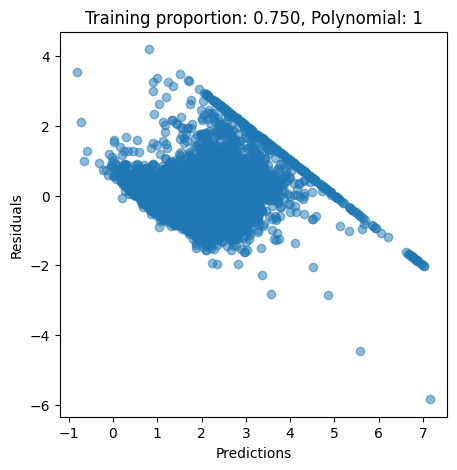

In [29]:
residuals_plot(yte,tst_pred,0.75,1)

Graphically, we observe that residuals are not dispersed randomly around mean = 0, as one would wish from a linear regression (given that it is one of the assumptions).\
In general, a distribution of residuals of such type, suggests that something may be disturbing our linear regression, for example, as we found in section 2.1, there is an upper bound that resembles a line with negative slope.\
This is actually coherent with the **capping** imposed on the targets, all of the houses predicted above 500k are pushed down and this result on a line similar to a "roof" for the residuals.

### Step 4: The Pipeline

Now we put all of the pieces together into a repeatable, reproducible pipeline.

The function that we will write has to perform the following tasks:
1. Splitting data
1. Instantiating the model
1. Fitting the model
1. Evaluating the model
1. Visualizing results

We will experiment with different splits to see if the results are the same.

> Note: the pipeline is built in order to be re-used further in the code, so specifications like graphics and metrics can be set to True or False so that the user can suppress printing results in later applications.

In [30]:
# model = LinearRegression() ... or other, now we are already set at LinearRegression()

def pipeline(model_type, mydataframe, mytargets, train_sz, poly_degree, graphics=True, metrics=True, myseed=None):
    # if the seed is not passed onto the function, it is generated randomly (useful for error tracking)
    if myseed is None:
        myseed = random.randint(0, 2**32 - 1)
        
    # split the data
    (Xtr, Xte, ytr, yte) = train_test_split(mydataframe,mytargets,train_size=train_sz,random_state=myseed)

    # Initialise the model
    mymodel = model_type
    
    # Fit the model
    mymodel.fit(Xtr,ytr)

    # predictions
    tst_pred = mymodel.predict(Xte)
    trn_pred = mymodel.predict(Xtr)

    # One could suppress printing by setting metrics to False
    RMSE_tst, RMSE_trn, MAE_tst, MAE_trn = model_evaluation(yte,ytr,tst_pred,trn_pred,split=1-train_sz,print_results=metrics)

    # visualise (one could set graphics=False to suppress the plots, otherwise these are printed by default)
    if graphics is True:
        residuals_plot(yte,tst_pred,train_sz, poly_degree)

    return RMSE_tst, RMSE_trn, MAE_tst, MAE_trn
    

Example of the call `pipeline()`

Split on test: 0.250
---------------------
RMSE (test): 0.719
RMSE (train): 0.726
MAE (test): 0.529
MAE (train): 0.532
---------------------


(np.float64(0.719047536307693),
 np.float64(0.7262015061357625),
 0.5286221326331072,
 0.5320235233139853)

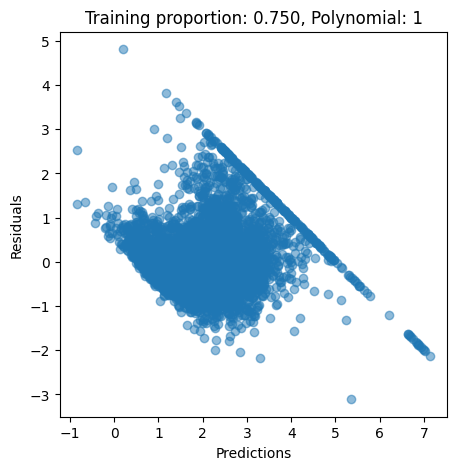

In [31]:
pipeline(LinearRegression(),df,targets,train_sz=0.75,poly_degree=1)

We can also repeat for different proportions, using the same function with different arguments:

Split on test: 0.900
---------------------
RMSE (test): 3.796
RMSE (train): 0.661
MAE (test): 0.554
MAE (train): 0.485
---------------------
Split on test: 0.700
---------------------
RMSE (test): 1.394
RMSE (train): 0.727
MAE (test): 0.530
MAE (train): 0.531
---------------------
Split on test: 0.600
---------------------
RMSE (test): 0.725
RMSE (train): 0.728
MAE (test): 0.534
MAE (train): 0.536
---------------------
Split on test: 0.500
---------------------
RMSE (test): 0.724
RMSE (train): 0.726
MAE (test): 0.532
MAE (train): 0.534
---------------------
Split on test: 0.300
---------------------
RMSE (test): 0.722
RMSE (train): 0.726
MAE (test): 0.530
MAE (train): 0.532
---------------------
Split on test: 0.100
---------------------
RMSE (test): 0.738
RMSE (train): 0.723
MAE (test): 0.531
MAE (train): 0.531
---------------------
Split on test: 0.050
---------------------
RMSE (test): 0.717
RMSE (train): 0.725
MAE (test): 0.523
MAE (train): 0.532
---------------------


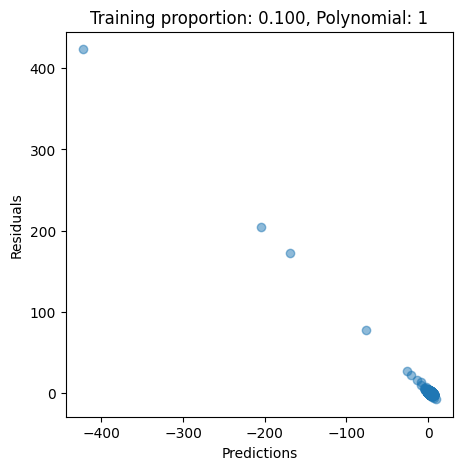

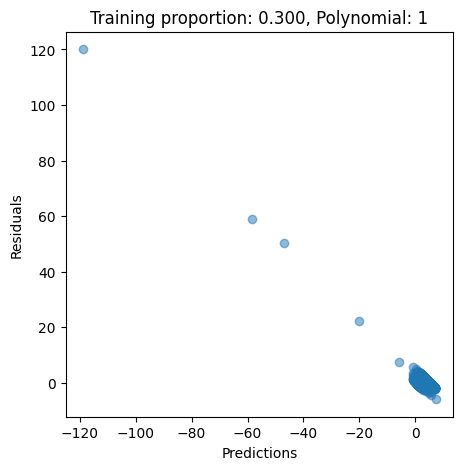

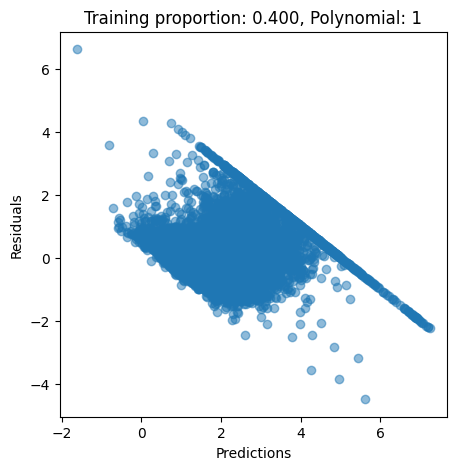

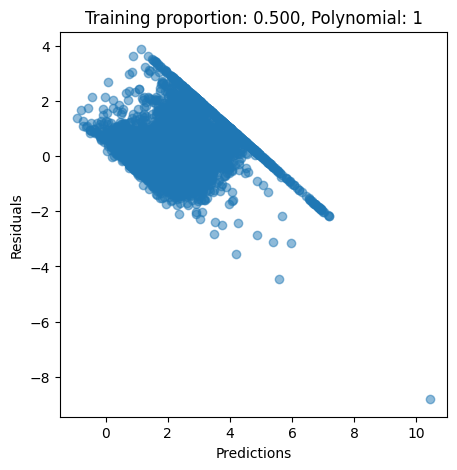

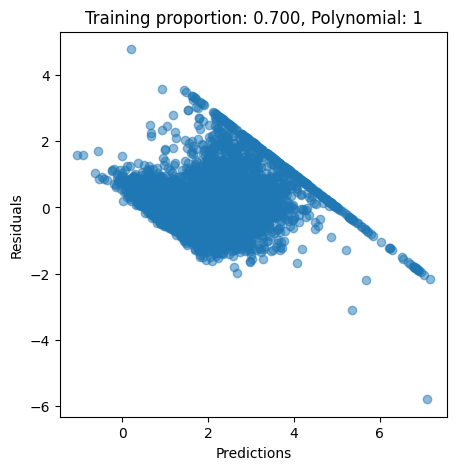

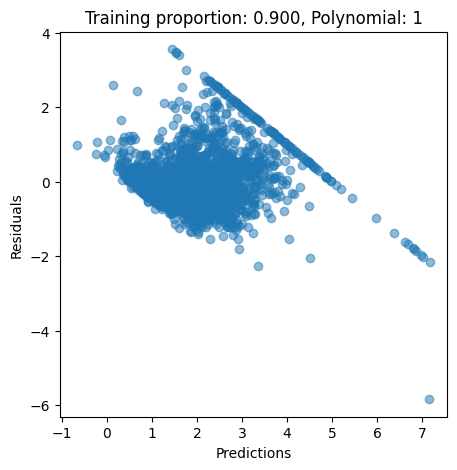

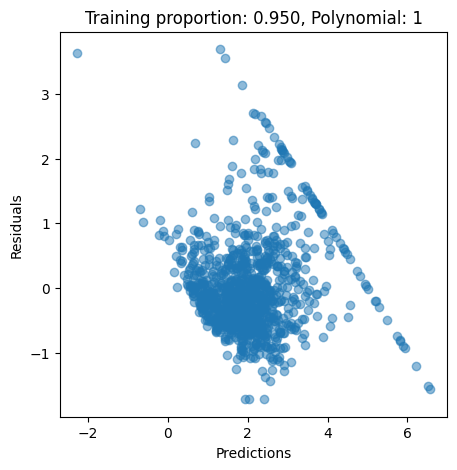

In [32]:
train_split = [0.10,0.30,0.40,0.50,0.70,0.90,0.95]

for t in train_split:
    pipeline(LinearRegression(),df,targets,train_sz=t, poly_degree=1)

Depending on the random seed, errors can be bigger, however on average results tend to be the same, and even the plot of residuals behave the same.\
For bigger proportions assigned to the test split (90%) results on the RMSE tend to be bigger.

---
---
## Part 2: Improving our Regressor

Now that we have a simple, baseline linear regression result, let's see if we can improve on it. This is where the real work begins, and where it is **super** important to ensure that the conclusions we draw are *valid*.

### Step 5: Increasing Model Capacity

> Check out the documentation for `sklearn.preprocessing.PolynomialFeatures`.

We now map the independent variables onto a **polynomial** basis of variable order and then fit our model using `pipeline()` from above and observe its behavior for different degree polynomial embeddings.

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# apply a transformation to the features for different degrees of polynomials
def transformations(mymodel,df,degrees,prints=True):
    results = np.zeros((len(degrees),4))                      
    for d in degrees:
        idx = degrees.index(d)
        poly = PolynomialFeatures(degree=d, include_bias=False)
        X_p = poly.fit_transform(df) # mapping the independent variables onto a polynomial basis
        
        if prints is True:
            print(f"Degree of polynomial: {d}")

        # Here we use the function pipeline defined in Part 1:
        RMSE_tst, RMSE_trn, MAE_tst, MAE_trn = pipeline(mymodel,X_p,targets,0.75,d,graphics=prints,metrics=prints)
        results[idx,0] = RMSE_tst
        results[idx,1] = RMSE_trn
        results[idx,2] = MAE_tst
        results[idx,3] = MAE_trn

        if prints is True:
            print("----------------------------------------------------------------")

    if prints is True:
        fig, axs = plt.subplots(1, 2, figsize=(8, 4)) 

        axs[0].plot(degrees, results[:, 0], label="RMSE test")
        axs[0].plot(degrees, results[:, 1], label="RMSE train")
        axs[0].set_xlabel("Polynomial Degree")
        axs[0].set_ylabel("RMSE")
        axs[0].legend()
        axs[0].set_title("RMSE vs Polynomial Degree")

        axs[1].plot(degrees, results[:, 2], label="MAE test")
        axs[1].plot(degrees, results[:, 3], label="MAE train")
        axs[1].set_xlabel("Polynomial Degree")
        axs[1].set_ylabel("MAE")
        axs[1].legend()
        axs[1].set_title("MAE vs Polynomial Degree")

        plt.tight_layout()
        
    return results

Degree of polynomial: 1
Split on test: 0.250
---------------------
RMSE (test): 0.714
RMSE (train): 0.728
MAE (test): 0.529
MAE (train): 0.534
---------------------
----------------------------------------------------------------
Degree of polynomial: 2
Split on test: 0.250
---------------------
RMSE (test): 1.909
RMSE (train): 0.648
MAE (test): 0.488
MAE (train): 0.461
---------------------
----------------------------------------------------------------
Degree of polynomial: 3
Split on test: 0.250
---------------------
RMSE (test): 3.081
RMSE (train): 0.591
MAE (test): 0.495
MAE (train): 0.421
---------------------
----------------------------------------------------------------
Degree of polynomial: 4
Split on test: 0.250
---------------------
RMSE (test): 6.325
RMSE (train): 0.595
MAE (test): 0.597
MAE (train): 0.430
---------------------
----------------------------------------------------------------
Degree of polynomial: 5
Split on test: 0.250
---------------------
RMSE (test): 

array([[ 0.71415085,  0.72798118,  0.52918015,  0.53448818],
       [ 1.90896147,  0.64815872,  0.48846989,  0.46103455],
       [ 3.08101231,  0.59148604,  0.49458314,  0.42059546],
       [ 6.32510388,  0.59517635,  0.5973466 ,  0.42965963],
       [44.63163057,  0.90040599,  1.34465919,  0.68035708]])

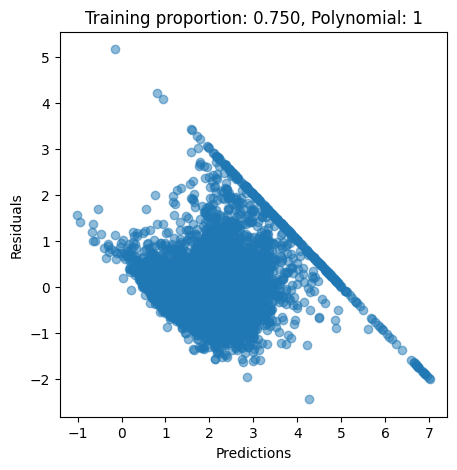

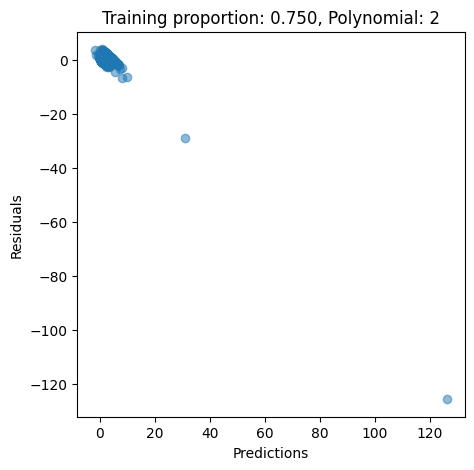

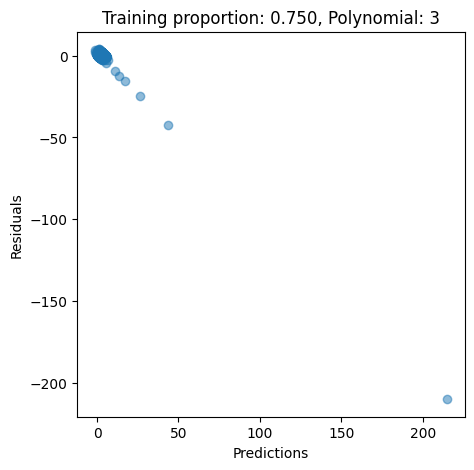

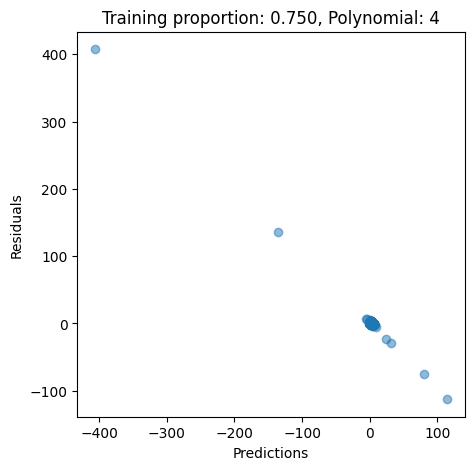

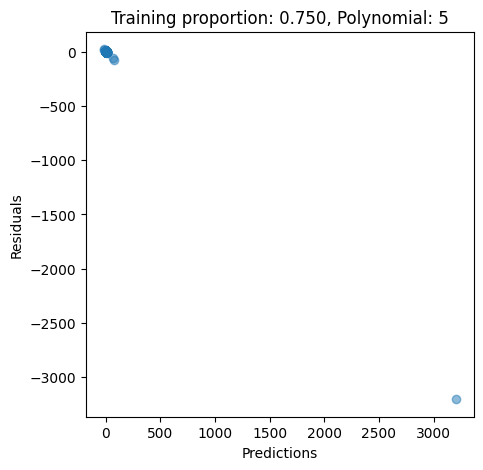

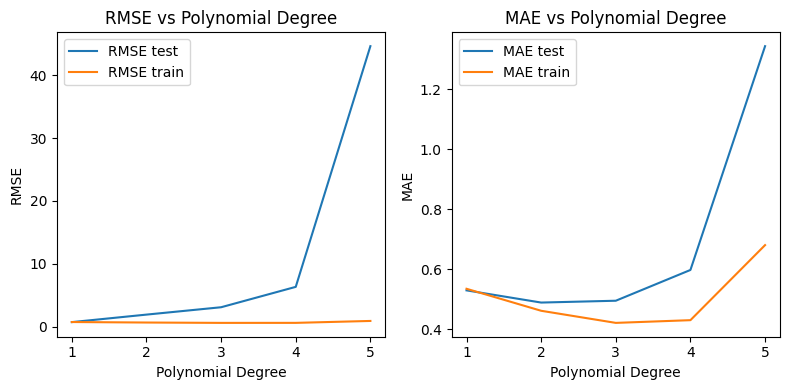

In [35]:
# call the function
model2 = LinearRegression()
degrees = [1,2,3,4,5]
transformations(model2,df,degrees)

The RMSE seems to grow for polynomial transformations bigger than 2.\
Graphically, it is shown in the last plot where we plotted together RMSE train and test for increasing polynomial degrees.\
We observe a bigger Test error for higher polynomial degrees, both on RMSE and MAE, despite having lower training errors, thus suggesting overfitting and loss of generalisation properties with growing degrees of the polynomial transformation.

Finally, let us now move to a more rigorous and state-of-the-art selection of the best model in the last step.

### Step 6: Hyperparameter Selection and Cross-validation

How should we select the correct *degree* for our polynomial basis? Is the performance on the *training* set equal to the performance on the *test* set? Why?

We have seen that the performance on the training set is more accurate for higher order polynomials as a sign of overfitting, meaning that the model is learning too much from the training data and that it commits higher errors when used to predict data other than training data.\
In order to implement a cross validation like K-Folds we can rewrite the function **transformations** defined before so that it also performs a more rigorous model selection. based on scores.

We wish to define a function that can be used again as pipeline to be called when replicating the experiment with different data:

In [39]:
from sklearn.model_selection import cross_val_score, KFold

def crossvalidation(mymodel,mydf,mytargets,mydegrees,k,prints=False): # printing is suppressed with False to avoid congestion of outputs
    rmse_avg = np.zeros(len(mydegrees))

    for d in mydegrees:
        idx=mydegrees.index(d)
        poly = PolynomialFeatures(degree=d,include_bias=False)
        X_p = poly.fit_transform(mydf)

        # Additionally, here we include crossvalidation with `KFold()`:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_fold = []

        for train_idx, test_idx in kf.split(X_p):
            X_train, X_test = X_p[train_idx],X_p[test_idx]
            y_train, y_test = mytargets.iloc[train_idx], targets.iloc[test_idx]

            RMSE_tst, _, _, _ = pipeline(mymodel,X_p,targets,0.75,d,graphics=prints,metrics=prints)
            rmse_fold = np.append(rmse_fold,RMSE_tst)

        rmse_avg[idx] = np.mean(rmse_fold)

    plt.figure(figsize=(6,6))
    plt.plot(mydegrees,rmse_avg,linestyle='-')
    plt.xlabel("Polynomial Degree")
    plt.ylabel("Cross-validated RMSE on Test set")
    plt.title("Cross-Validation of RMSE vs Polynomial Degrees")
    plt.xticks(degrees)

    return rmse_avg       

[7.27306083e-01 1.36619278e+00 1.13120237e+01 1.38598666e+03
 1.03790198e+02]


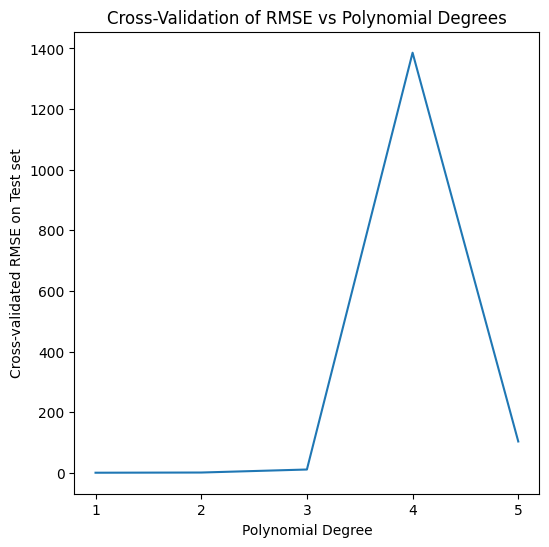

In [40]:
# Calling the function
degrees=[1,2,3,4,5]
rmse_avg = crossvalidation(mymodel=LinearRegression(),mydf=df,mytargets=targets,mydegrees=degrees,k=5)
print(rmse_avg)

The last `crossvalidation()` function replicate our analysis and can be used as pipeline in order to replicate the experiment with different models, data, degrees of polinomials and k-fold. 

> Important note: We have arrived here by steps, but one could have already produced the pipeline and used it to draw conclusions.

## Results

In terms of results, based on our test splits and k-fold cross-validation results, we are able to conclude that a polynomial degree smaller or equal than 2 (applied to the independent variables of the model) yields the best generalisation.\
We can say this since as the polynomial order is increased, the RMSE on the test folds increases sensibly WHILTS the error on the training set remains low, an evident sign of overfitting.

Thus, we can now conclude that we are supported by data in drawing this choice both from a numerical observation of RMSE averaged in repeated experiments (the experiment that I have done by hand, with same split and order) and more precisely and rigorously with **cross-validation** results.\
We have also as observed this results graphically.